# Вариант 1

Обязательные требования:
1. Все графики должны быть подписаны (заголовок, оси)
2. К каждому графику должны быть представлены выводы (что вы увидели, какие зависимости, какие особенности, что тот или иной график говорит вам о данных).
3. Графики должны быть читабельными (если сделаете такой масштаб, что ничего не будет видно или все будет налазить друг на друга - это не засчитывается).

## Загрузка данных

Вам датасет о погоде за период времени с 2006 по 2016 год: `weatherHistory.csv`

In [47]:
#!pip install matplotlib

In [48]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [58]:
df = pd.read_csv(r"https://raw.githubusercontent.com/Adelaaas/Data_science_basic_24_25_group_1/refs/heads/main/home_work_EDA/weatherHistory_var1.csv")
df.head(2)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Year,Month,Day,Hour,DayOfWeek,Season
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,2006,3,31,22,Friday,1
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,2006,3,31,23,Friday,1


## График 1

Построить точечный график зависимости переменной `Temperature (C)` от `Wind Speed (km/h)` с учётом третей переменной `Precip Type`.

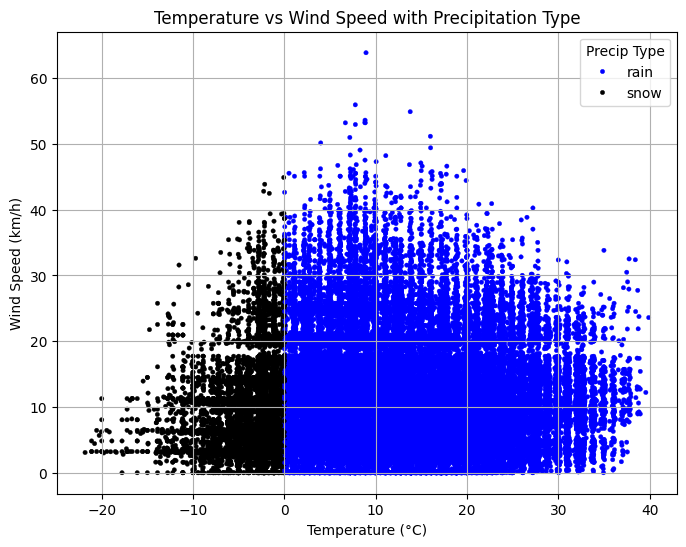

In [45]:
c = {
    "rain": "blue",
    "snow": "black"
}

df["Color"] = df["Precip Type"].map(c).fillna("gray")
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="Temperature (C)", y="Wind Speed (km/h)", hue="Precip Type", palette=c, s=10, edgecolor=None)
plt.title("Temperature vs Wind Speed with Precipitation Type")
plt.xlabel("Temperature (°C)")
plt.ylabel("Wind Speed (km/h)")
plt.grid()
plt.show()

Дождь возникает при температурах выше нуля и имеет в основном выше скорость чем у снега, в то время как снег возникает при температурах ниже нуля имея меньшую скорость. Также в данных есть пропуски.

## График 2

Постройте 4 графика на одной фигуре, как расположить координатные плоскости - это на ваше усмотрение.

Это должны быть гистограммы для следующих переменных:
- `Precip Type`
- `Season`
- `DayOfWeek`
- `Year`

Каждый график должен быть своего цвета, также задайте цвет отличный от белого для бекграунда всей фигуры.

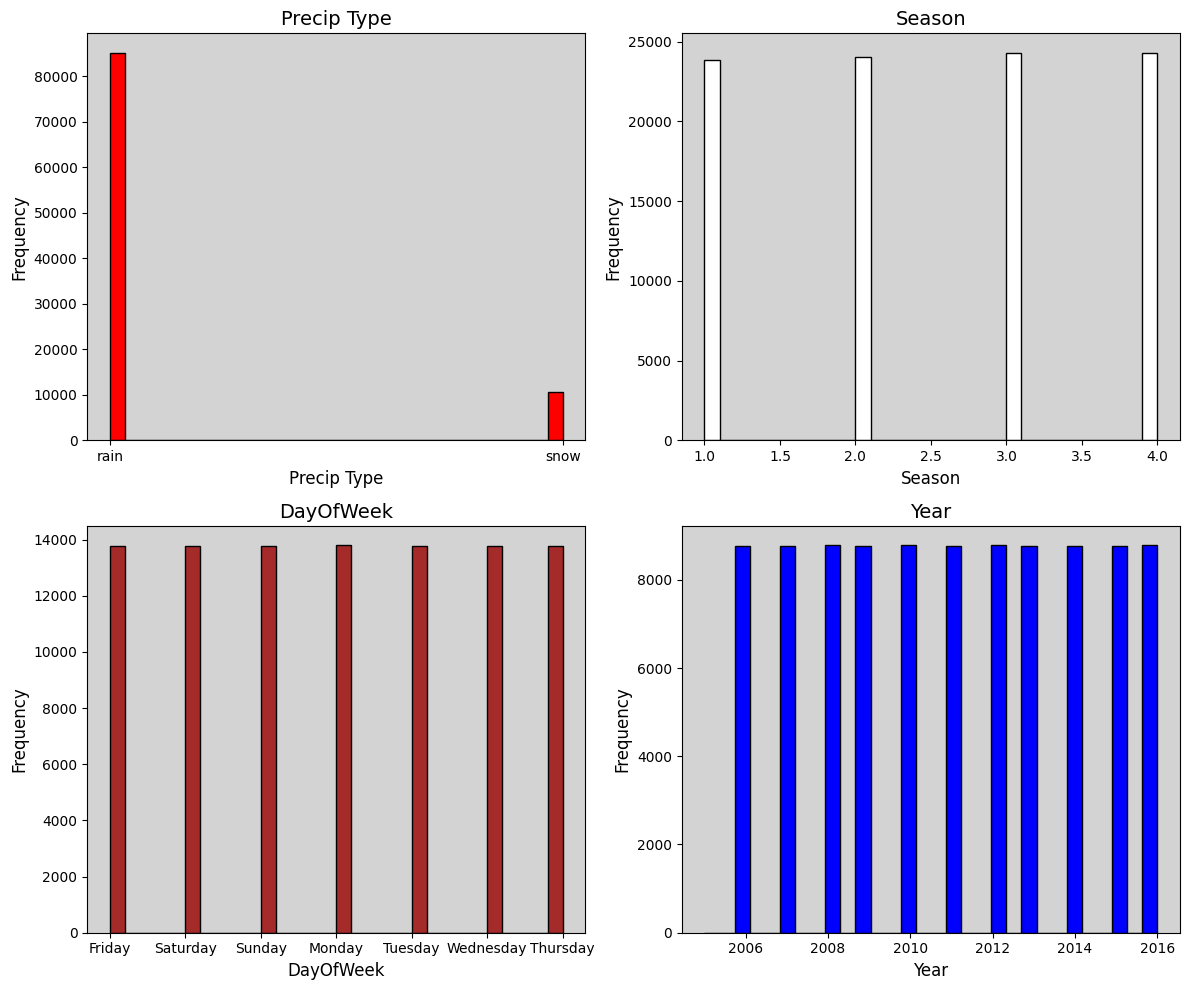

In [36]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))


axs[0, 0].hist(df['Precip Type'].dropna(), bins=30, color='red', edgecolor='black')
axs[0, 0].set_title('Precip Type', fontsize=14)
axs[0, 0].set_xlabel('Precip Type', fontsize=12)
axs[0, 0].set_ylabel('Frequency', fontsize=12)
axs[0,0].set_facecolor('lightgray')

axs[0, 1].hist(df['Season'].dropna(), bins=30, color='white', edgecolor='black')
axs[0, 1].set_title('Season', fontsize=14)
axs[0, 1].set_xlabel('Season', fontsize=12)
axs[0, 1].set_ylabel('Frequency', fontsize=12)
axs[0,1].set_facecolor('lightgray')

axs[1, 0].hist(df['DayOfWeek'].dropna(), bins=30, color='brown', edgecolor='black')
axs[1, 0].set_title('DayOfWeek', fontsize=14)
axs[1, 0].set_xlabel('DayOfWeek', fontsize=12)
axs[1, 0].set_ylabel('Frequency', fontsize=12)
axs[1,0].set_facecolor('lightgray')

axs[1, 1].hist(df['Year'].dropna(), bins=30, color='blue', edgecolor='black')
axs[1, 1].set_title('Year', fontsize=14)
axs[1, 1].set_xlabel('Year', fontsize=12)
axs[1, 1].set_ylabel('Frequency', fontsize=12)
axs[1,1].set_facecolor('lightgray')

plt.tight_layout()
plt.show()

Можно сделать вывод что все графики кроме первого имеют примерно одиноковое количество вхождений.

## График 3

Визуализируйте матрицу корреляции в виде heatmap.

Все должно быть ЧИТАБЕЛЬНО!

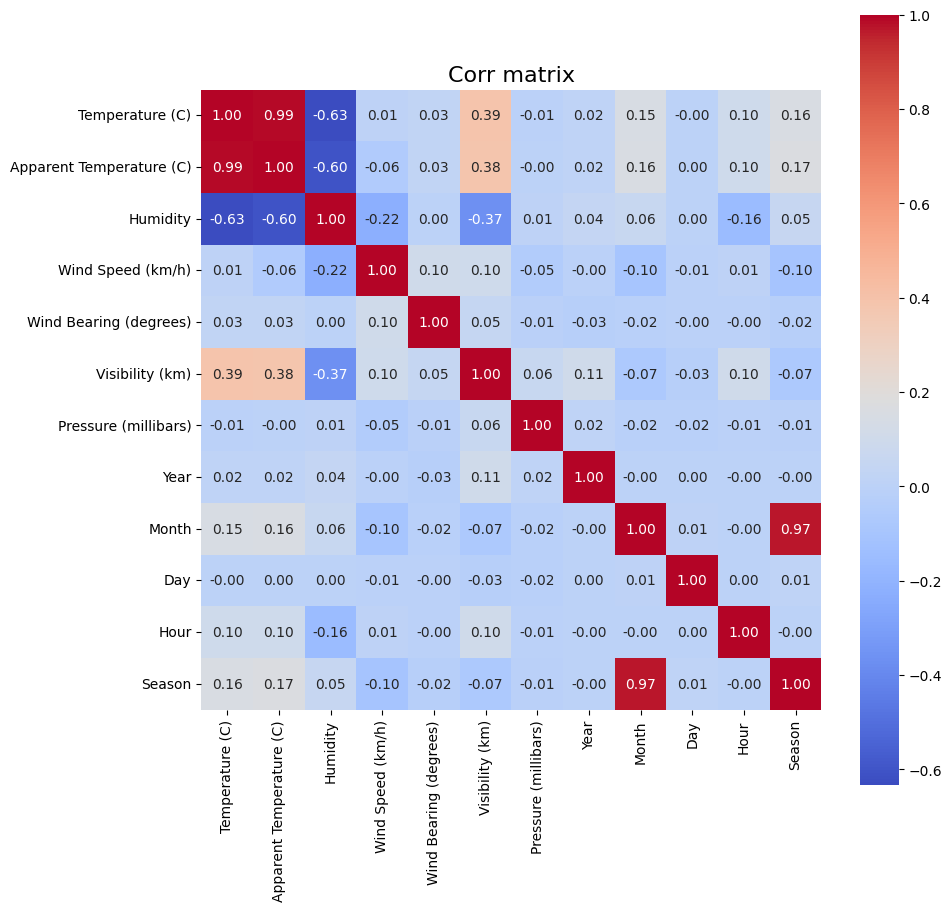

In [ ]:
df=df.drop(columns = 'Loud Cover')
plt.figure(figsize=(10, 10))
sns.heatmap(df.select_dtypes(include=['float64', 'int64']).corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Corr matrix', fontsize=16)
plt.show()

Можно сделать вывод, что мы имеем сильну корреляцию: сезон-месяц, температура-кажущаяся температура. Также можно заметить отсутствие данных в Loud Cover.

## График 4

Постройте графики boxplot для следующих переменных:
- `Temperature (C)` с учетом переменной `Precip Type`
- `Pressure (millibars)` с учетом переменной `Precip Type`

Как их построить решаете самостоятельно.

Проанализируйте выборы.

Text(0.5, 0, 'Pressure (millibars)')

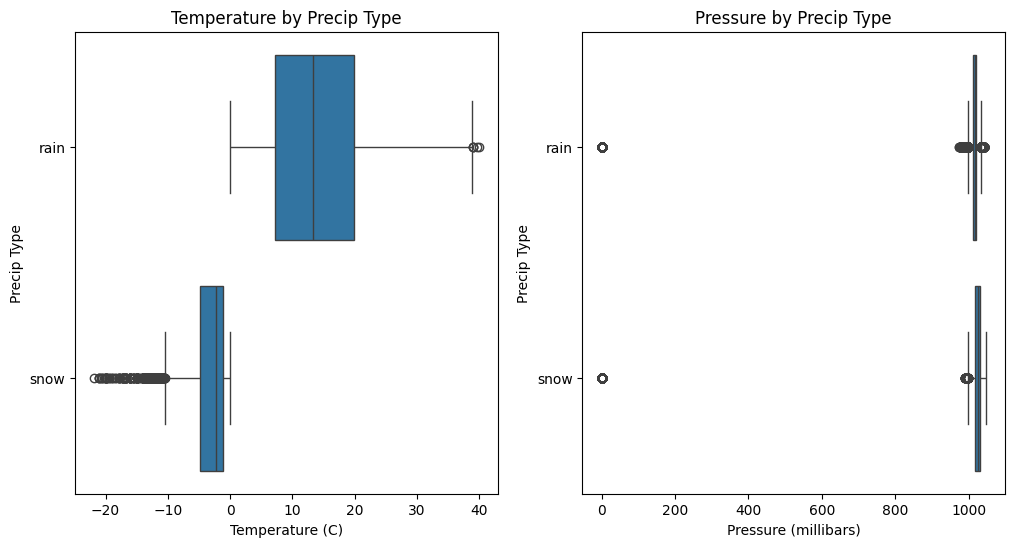

In [ ]:
df['Precip Type'] = df['Precip Type'].astype('category')
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='Temperature (C)', y='Precip Type', data=df)
plt.title('Temperature by Precip Type')
plt.ylabel('Precip Type')
plt.xlabel('Temperature (C)')

plt.subplot(1, 2, 2)
sns.boxplot(x='Pressure (millibars)', y='Precip Type', data=df)
plt.title('Pressure by Precip Type')
plt.ylabel('Precip Type')
plt.xlabel('Pressure (millibars)')

На первом графике можно заметить малое количество выбросов у дождя и большое у снега, можно заметить с какой температуры начинается снег.
На втором графике можно заметить два очень крупных выброса и большое количество выбросов у дождя.

## График 5

Постройте график распределения переменной `Wind Bearing (degrees)` с учетом переменной `Precip Type`.

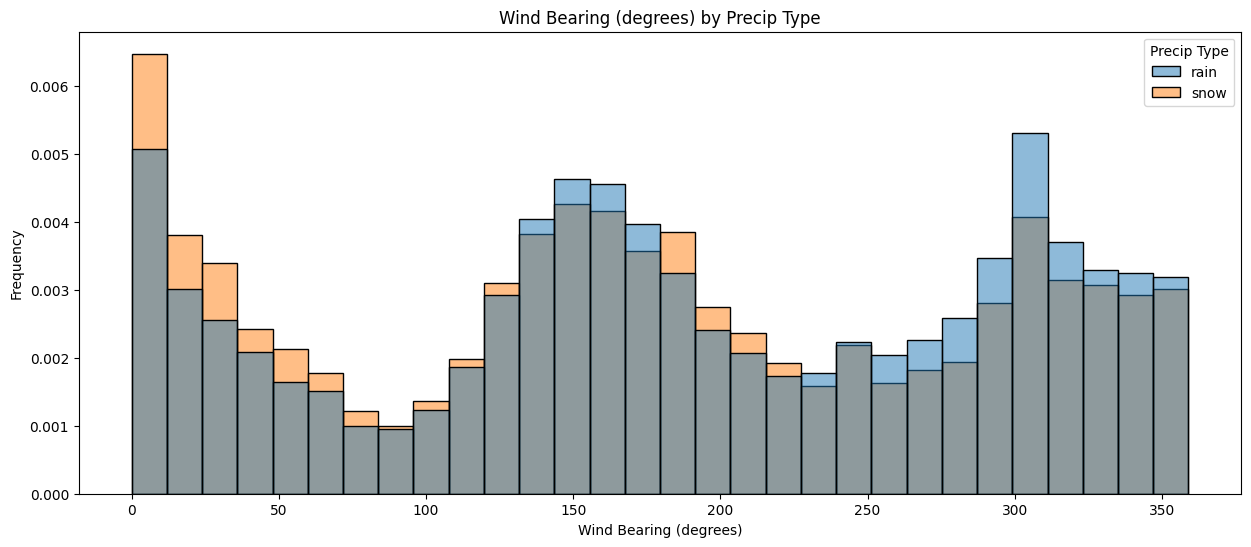

In [ ]:
df['Precip Type'] = df['Precip Type'].astype('category')
plt.figure(figsize=(15, 6))
sns.histplot(data=df, x='Wind Bearing (degrees)', hue='Precip Type', stat='density', common_norm=False, bins=30)
plt.title('Wind Bearing (degrees) by Precip Type')
plt.xlabel('Wind Bearing (degrees)')
plt.ylabel('Frequency')
plt.show()

## График 6

Постройте график среднегодовой температуры, т.е. график зависимости года от средней температуры в этом году.

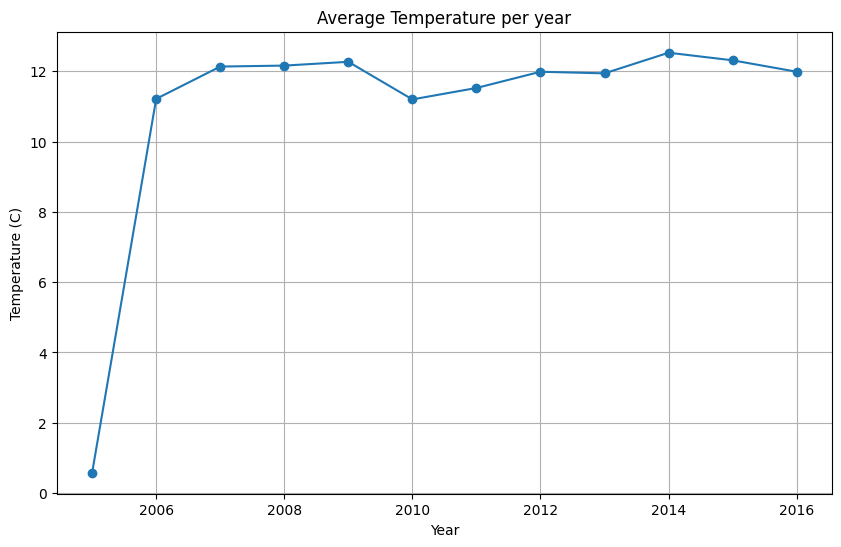

In [ ]:
df['Formatted Date'],df['Year'] = pd.to_datetime(df['Formatted Date']),df['Formatted Date'].dt.year
average_temp_per_year = df.groupby('Year')['Temperature (C)'].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.plot(average_temp_per_year['Year'], average_temp_per_year['Temperature (C)'], marker='o')
plt.title('Average Temperature per year')
plt.xlabel('Year')
plt.ylabel('Temperature (C)')
plt.grid()
plt.show()

## График 7

Найдите любой **нестандартный** график и постройте его. На ваш выбор.

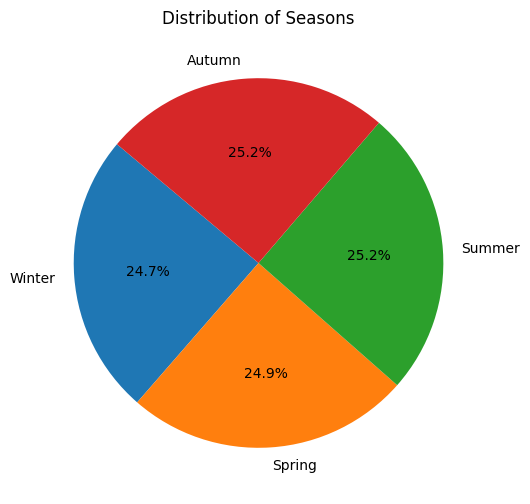

In [63]:
season_counts = df["Season"].value_counts().sort_index()
season_labels = {1: "Winter", 2: "Spring", 3: "Summer", 4: "Autumn"}
plt.figure(figsize=(6, 6))
plt.pie(season_counts, labels=[season_labels[s] for s in season_counts.index], autopct="%1.1f%%", startangle=140)
plt.title("Distribution of Seasons")
plt.show()